In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import seaborn
import matplotlib.pyplot as plt

In [2]:
# load the data

data = np.load('training_data/training_data.npz', allow_pickle=True)

train_set = data['train_set']
test_set = data['test_set']
val_set = data['val_set']

In [3]:
val_set

array([{'x': array([[23.11, 23.47, 23.46, 23.26, 24.27, 24.1 , 24.4 , 24.28, 25.11,
               25.19, 25.89, 26.06, 27.53, 27.82, 28.61, 28.83, 28.02, 27.81,
               26.59, 26.21, 25.43, 25.46, 24.47, 24.56, 24.33, 24.35, 23.42,
               23.64, 23.79, 23.52, 21.4 , 20.37],
              [23.62, 23.27, 23.8 , 23.62, 24.24, 24.52, 24.65, 24.72, 25.37,
               25.4 , 26.09, 26.39, 28.27, 28.98, 30.06, 30.05, 29.3 , 28.86,
               27.21, 26.75, 25.65, 25.27, 24.71, 24.8 , 24.46, 24.28, 23.7 ,
               23.41, 23.77, 23.02, 22.52, 21.27],
              [23.74, 23.69, 23.84, 23.95, 24.55, 24.43, 24.72, 24.76, 25.51,
               25.86, 27.09, 27.65, 30.46, 31.21, 32.11, 32.4 , 31.73, 31.5 ,
               28.83, 27.67, 25.9 , 25.64, 24.93, 24.61, 24.42, 24.27, 23.53,
               23.3 , 23.28, 23.52, 22.42, 22.37],
              [23.76, 23.51, 24.02, 23.99, 24.46, 24.57, 24.85, 24.67, 25.52,
               25.7 , 27.15, 28.48, 31.7 , 32.22, 32.95, 32.7

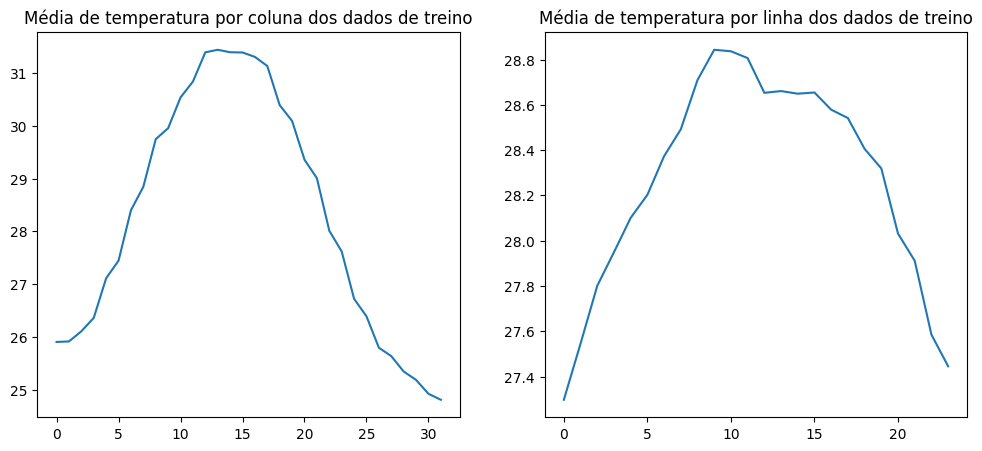

In [37]:
# distribuição média de pixels de cada coluna de cada imagem 'x' do train_set

sums = []
for i in train_set:
    img = i['x']
    sum_col = np.mean(img,axis=0)
    sums.append(sum_col)
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.plot(np.mean(sums,axis=0))
plt.title('Média de temperatura por coluna dos dados de treino')

sums = []
for i in train_set:
    img = i['x']
    sum_col = np.mean(img,axis=1)
    sums.append(sum_col)

plt.subplot(1,2,2)
plt.plot(np.mean(sums,axis=0))
plt.title('Média de temperatura por linha dos dados de treino')
plt.show()

In [38]:
import numpy as np

train_set_arg = []

range_shift = 7

for n in range(-range_shift,range_shift+1):
    for i in train_set:
        img = i['x']
        min_id = np.argmin(np.mean(img, axis=0))  # Encontre a coluna com a menor temperatura média
        # converta os valores menores que a mediana dessa coluna para o valor da mediana
        img[:, min_id] = np.where(img[:, min_id] < np.median(img[:, min_id]), np.median(img[:, min_id]), img[:, min_id])
        min_id = np.argmin(np.mean(img, axis=0))
        shifted = np.roll(img, n, axis=1)  # Mova a imagem horizontalmente
        if n > 0:
            shifted[:, :n] = img[:, min_id:min_id+1]    # 
            shifted[:, :n] = shifted[:, :n] + np.random.normal(0, 0.25, shifted[:, :n].shape)
        else:
            shifted[:, n:] = img[:, min_id:min_id+1]  
            shifted[:, n:] = shifted[:, n:] + np.random.normal(0,0.25, shifted[:, n:].shape)

        train_set_arg.append({'x': shifted, 'y': i['y']})  # Adicione a imagem modificada ao conjunto de teste

train_set = train_set_arg.copy()

val_set_arg = []

for n in range(-range_shift,range_shift+1):
    for i in val_set:
        img = i['x']
        min_id = np.argmin(np.mean(img, axis=0))  # Encontre a coluna com a menor temperatura média
        # converta os valores menores que a mediana dessa coluna para o valor da mediana
        img[:, min_id] = np.where(img[:, min_id] < np.median(img[:, min_id]), np.median(img[:, min_id]), img[:, min_id])
        min_id = np.argmin(np.mean(img, axis=0))
        shifted = np.roll(img, n, axis=1)  # Mova a imagem horizontalmente
        if n > 0:
            shifted[:, :n] = img[:, min_id:min_id+1]    # 
            shifted[:, :n] = shifted[:, :n] + np.random.normal(0, 0.25, shifted[:, :n].shape)
        else:
            shifted[:, n:] = img[:, min_id:min_id+1]  
            shifted[:, n:] = shifted[:, n:] + np.random.normal(0,0.25, shifted[:, n:].shape)

        val_set_arg.append({'x': shifted, 'y': i['y']})  # Adicione a imagem modificada ao conjunto de teste

val_set = val_set_arg.copy()

In [42]:
# save argmented data

np.savez('training_data/training_data_arg.npz', train_set=train_set, test_set=test_set, val_set=val_set)

In [39]:
# random forest

from sklearn.ensemble import RandomForestClassifier

# train random forest

rf = RandomForestClassifier(n_estimators=300,max_features=320,max_depth=20,min_samples_leaf=3)

# reshape x to 1d array

train_set = [{'x':x['x'].reshape(-1), 'y':x['y']} for x in train_set]
val_set = [{'x':x['x'].reshape(-1), 'y':x['y']} for x in val_set]

train_set2 = train_set + val_set

rf.fit([x['x'] for x in train_set2], [x['y'] for x in train_set2])

# test random forest

test_set = [{'x':x['x'].reshape(-1), 'y':x['y']} for x in test_set]

rf.score([x['x'] for x in test_set], [x['y'] for x in test_set])


0.9259259259259259

Text(0.5, 1.0, 'Feature Importance Random Forest')

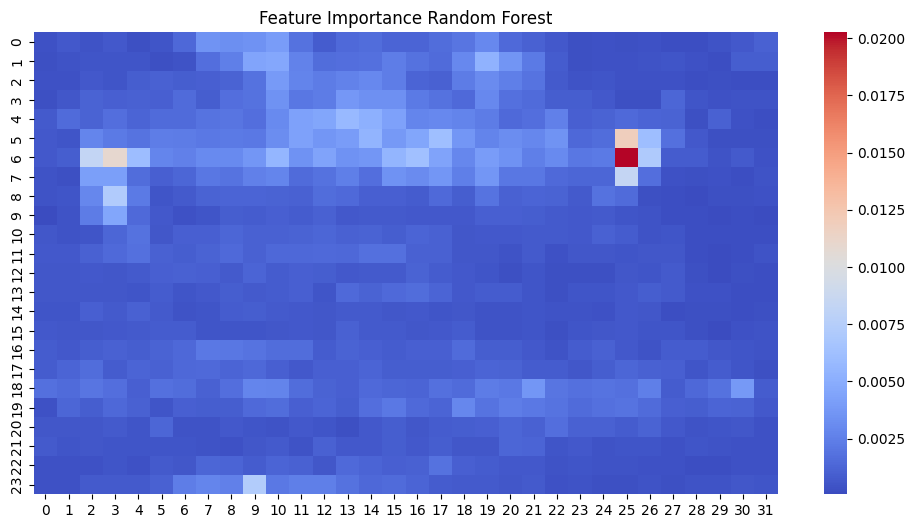

In [40]:
# plot feature importance

importances = rf.feature_importances_

importances = importances.reshape(24,32)

plt.figure(figsize=(12, 6))

seaborn.heatmap(importances, cmap='coolwarm', annot=False, fmt='.2f')

plt.title('Feature Importance Random Forest')

In [41]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0, oob_score=True)
rf.fit([x['x'] for x in train_set], [x['y'] for x in train_set])
print(rf.oob_score_)

0.8944444444444445


In [8]:
val_set = [{'x':x['x'].reshape(-1), 'y':x['y']} for x in val_set]

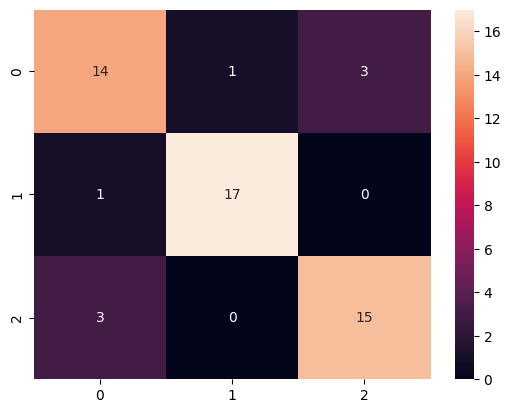

In [9]:
rf.score([x['x'] for x in train_set], [x['y'] for x in train_set])

# confusion matrix

from sklearn.metrics import confusion_matrix

confusion_matrix([x['y'] for x in test_set], rf.predict([x['x'] for x in test_set]))

# plot confusion matrix

import seaborn as sn

sn.heatmap(confusion_matrix([x['y'] for x in test_set], rf.predict([x['x'] for x in test_set])), annot=True)

plt.show()

In [33]:
# decision tree

from sklearn.tree import DecisionTreeClassifier

# train decision tree

dt = DecisionTreeClassifier(max_depth=50)

dt.fit([x['x'] for x in train_set2], [x['y'] for x in train_set2])

# test decision tree

dt.score([x['x'] for x in test_set], [x['y'] for x in test_set])

0.7222222222222222

In [25]:
# xgboost

import xgboost as xgb
import torch

# train xgboost

if torch.cuda.is_available():
    print('Using GPU')
    xgb_model = xgb.XGBClassifier(
    objective="multi:softprob",
    eval_metric="mlogloss",
    num_class=3,
    n_estimators=5000,
    max_depth=50,
    learning_rate=0.005,
    verbosity=2,
    tree_method='gpu_hist',
    )
else:
    print('Using CPU')
    xgb_model = xgb.XGBClassifier(
    objective="multi:softprob",
    eval_metric="mlogloss",
    num_class=3,
    n_estimators=3000,
    max_depth=30,
    learning_rate=0.01,
    verbosity=2
    )

xgb_model.fit([x['x'] for x in train_set], [x['y'] for x in train_set], 
              early_stopping_rounds=10, eval_set=[([x['x'] for x in val_set], [x['y'] for x in val_set])])

# test xgboost

xgb_model.score([x['x'] for x in test_set], [x['y'] for x in test_set])

Using GPU


c:\Users\emanu\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:1.09530
[1]	validation_0-mlogloss:1.09194
[2]	validation_0-mlogloss:1.08867
[3]	validation_0-mlogloss:1.08544
[4]	validation_0-mlogloss:1.08233
[5]	validation_0-mlogloss:1.07922
[6]	validation_0-mlogloss:1.07609
[7]	validation_0-mlogloss:1.07302
[8]	validation_0-mlogloss:1.07000
[9]	validation_0-mlogloss:1.06700
[10]	validation_0-mlogloss:1.06406
[11]	validation_0-mlogloss:1.06108
[12]	validation_0-mlogloss:1.05801
[13]	validation_0-mlogloss:1.05511
[14]	validation_0-mlogloss:1.05226
[15]	validation_0-mlogloss:1.04932
[16]	validation_0-mlogloss:1.04653
[17]	validation_0-mlogloss:1.04375
[18]	validation_0-mlogloss:1.04093
[19]	validation_0-mlogloss:1.03827
[20]	validation_0-mlogloss:1.03542
[21]	validation_0-mlogloss:1.03270
[22]	validation_0-mlogloss:1.03009
[23]	validation_0-mlogloss:1.02796
[24]	validation_0-mlogloss:1.02574
[25]	validation_0-mlogloss:1.02361
[26]	validation_0-mlogloss:1.02144
[27]	validation_0-mlogloss:1.01934
[28]	validation_0-mlogloss:1.0

0.8703703703703703

In [11]:
# plot data wrong classified by xgboost

wrong_classified = []

for i in range(len(test_set)):
    if test_set[i]['y'] != xgb_model.predict([test_set[i]['x']]):
        wrong_classified.append(i)

wrong_classified

[10, 11, 28, 29, 48, 51]

In [12]:
# # make plot of wrong classified data

# fig = plt.subplots(3,3)
# j = 1
# for i in wrong_classified:
#     plt.subplot(3,3,j)
#     plt.imshow(test_set[i]['x'].reshape(24,32))
#     plt.title('true: '+str(test_set[i]['y'])+' pred: '+str(xgb_model.predict([test_set[i]['x']])))
#     # set axis off
#     plt.axis('off')
    
#     j += 1

# plt.show()

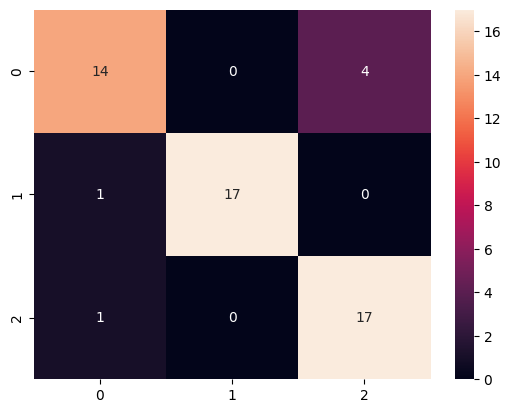

In [13]:
# plot confusion matrix

sn.heatmap(confusion_matrix([x['y'] for x in test_set], xgb_model.predict([x['x'] for x in test_set])), annot=True)

plt.show()

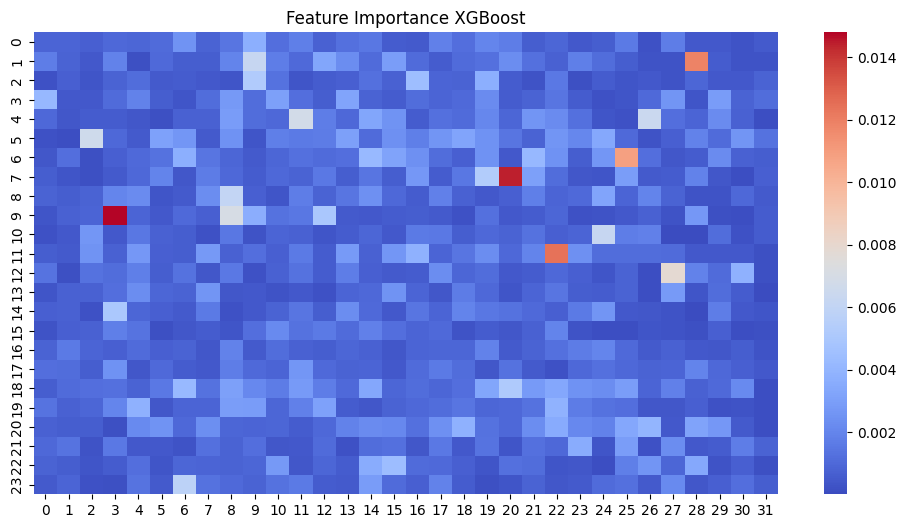

In [14]:
# plot feature importance

importances = xgb_model.feature_importances_

importances = importances.reshape(24,32)

plt.figure(figsize=(12, 6))

seaborn.heatmap(importances, cmap='coolwarm', annot=False, fmt='.2f')

plt.title('Feature Importance XGBoost')

plt.show()

train accuracy:  1.0
test accuracy:  0.8703703703703703


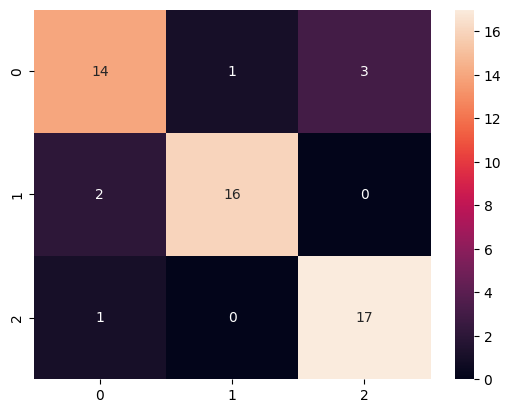

In [15]:
# using validation set to tune hyperparameters

xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42, max_depth=10, n_estimators=100)

xgb_model.fit([x['x'] for x in train_set], [x['y'] for x in train_set])

xgb_model.score([x['x'] for x in test_set], [x['y'] for x in test_set])

print('train accuracy: ', xgb_model.score([x['x'] for x in train_set], [x['y'] for x in train_set]))
print('test accuracy: ', xgb_model.score([x['x'] for x in test_set], [x['y'] for x in test_set]))
# confusion matrix

confusion_matrix([x['y'] for x in test_set], xgb_model.predict([x['x'] for x in test_set]))

# plot confusion matrix

sn.heatmap(confusion_matrix([x['y'] for x in test_set], xgb_model.predict([x['x'] for x in test_set])), annot=True)

plt.show()

In [16]:
# # plot wrong predictions

# wrong_predictions = [i for i in range(len(test_set)) if xgb_model.predict([test_set[i]['x']])[0] != test_set[i]['y']]

# fig = plt.subplots(2,3)
# j = 1
# for i in wrong_predictions:
#     plt.subplot(2,3,j)
#     plt.imshow(test_set[i]['x'].reshape(24,32))
#     plt.title('true: '+str(test_set[i]['y'])+' pred: '+str(xgb_model.predict([test_set[i]['x']])))
#     # set axis off
#     plt.axis('off')
    
#     j += 1

# plt.show()

In [24]:
# SVM 

from sklearn import svm

# train SVM

svm_model = svm.SVC(gamma='auto')

svm_model.fit([x['x'] for x in train_set], [x['y'] for x in train_set])

# test SVM

svm_model.score([x['x'] for x in test_set], [x['y'] for x in test_set])


0.9074074074074074

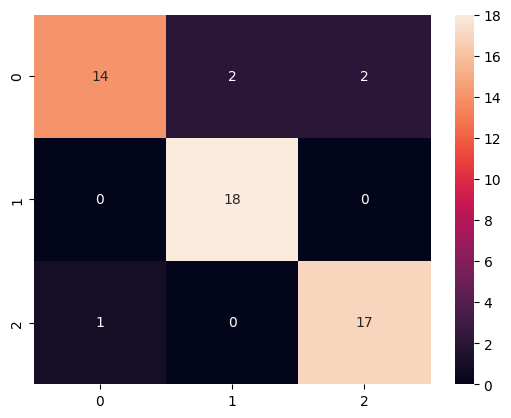

In [18]:
# plot confusion matrix

sn.heatmap(confusion_matrix([x['y'] for x in test_set], svm_model.predict([x['x'] for x in test_set])), annot=True)

plt.show()

In [19]:
# plot data wrong classified by xgboost

wrong_classified = []

for i in range(len(test_set)):
    if test_set[i]['y'] != xgb_model.predict([test_set[i]['x']]):
        wrong_classified.append(i)

wrong_classified

[10, 11, 21, 28, 29, 48, 51]

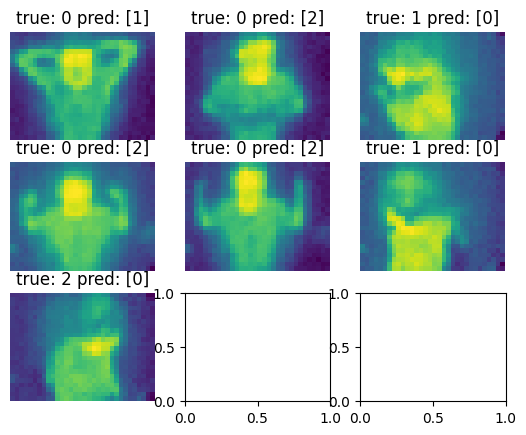

In [20]:
# make plot of wrong classified data

fig = plt.subplots(3,3)
j = 1
for i in wrong_classified:
    plt.subplot(3,3,j)
    plt.imshow(test_set[i]['x'].reshape(24,32))
    plt.title('true: '+str(test_set[i]['y'])+' pred: '+str(xgb_model.predict([test_set[i]['x']])))
    # set axis off
    plt.axis('off')
    
    j += 1

plt.show()

In [21]:
# kmeans

from sklearn.cluster import KMeans

# train kmeans

kmeans = KMeans(n_clusters=3, random_state=0).fit([x['x'] for x in train_set])

# test kmeans

kmeans.score([x['x'] for x in test_set])

c:\Users\emanu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


-153057.00952262242

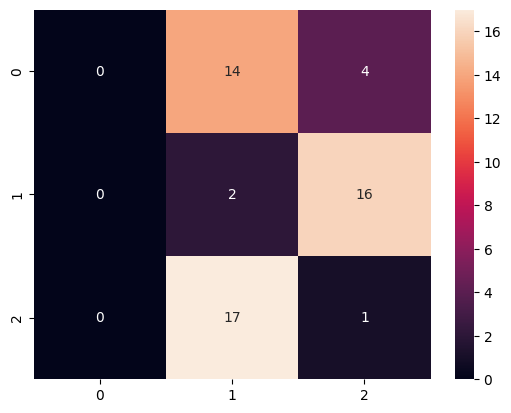

In [22]:
# plot confusion matrix

sn.heatmap(confusion_matrix([x['y'] for x in test_set], kmeans.predict([x['x'] for x in test_set])), annot=True)

plt.show()